## Simple Regression Dataset - Linear Regression Vs XGBoost

Model is trained with XGBoost installed in notebook instance

In the later examples, we will train using SageMaker's XGBoos algorithm.

Training on SageMaker takes several minutes (even for simple dataset)

If algorithm is supported on Python, we will try them locally on notebook instance

This allows us to quickly learn an algorithm, understand tuning options and then finally train on SageMaker Cloud

In this excercise, let's compare XGBoost and Linear Regression for simple regression dataset

In [3]:
# Install xgboost in notebook instance

!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.6 MB/s eta 0:00:00:00:0100:01


In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# import XGBOOST
import xgboost as xgb
#Linear regression

from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('linear_all.csv')

In [8]:
df.head()

,x,y
0,0,9.096098
1,1,28.824811
2,2,8.907676
3,3,17.083633
4,4,29.876032


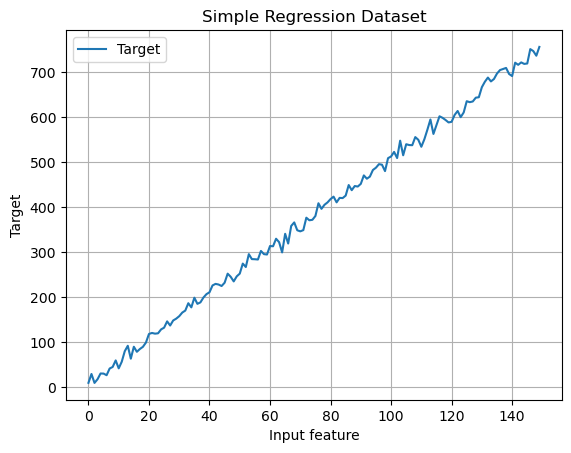

In [9]:
plt.plot(df.x, df.y,label='Target')
plt.grid(True)
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.title('Simple Regression Dataset')
plt.show()

In [12]:
# Let's load training and validation files

train_file = 'linear_train.csv'
validation_file = 'linear_validation.csv'

df_train = pd.read_csv(train_file, names = ['y','x'])
df_validation = pd.read_csv(validation_file, names=['y','x'])

In [13]:
df_train.head()

,y,x
0,410.895336,82
1,685.471526,134
2,563.187408,114
3,229.393430,42
4,550.185699,109


In [14]:
df_validation.head()

,y,x
0,358.387561,67
1,55.998210,11
2,329.890607,62
3,707.652049,137
4,556.161324,108


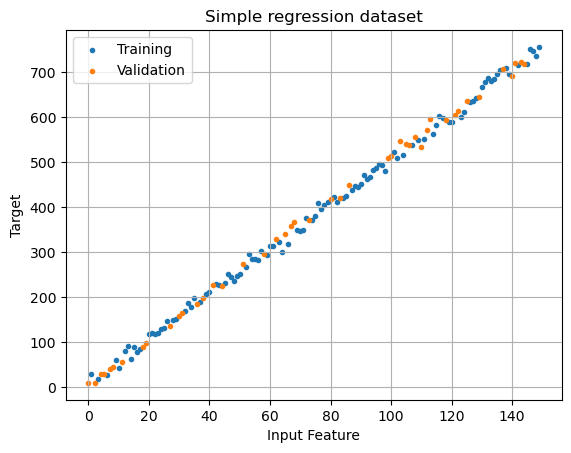

In [19]:
plt.scatter(df_train.x,df_train.y, label='Training',marker='.')
plt.scatter(df_validation.x, df_validation.y, label='Validation',marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Simple regression dataset')
plt.legend()
plt.show()

In [20]:
df_train.iloc[:,1:]

,x
0,82
1,134
2,114
3,42
4,109
...,...
100,78
101,91
102,3
103,55


In [22]:
df_train.iloc[:,0]

0      410.895336
1      685.471526
2      563.187408
3      229.393430
4      550.185699
          ...    
100    405.457270
101    470.882379
102     17.083633
103    284.248068
104    710.122834
Name: y, Length: 105, dtype: float64

In [23]:
df_train.iloc[:,0].ravel()

array([410.89533553, 685.47152592, 563.18740799, 229.39342979,
       550.18569879, 302.7217931 ,  28.82481117, 346.3529809 ,
       131.94069558, 420.39239691, 319.22259116, 680.0979786 ,
       509.53531383, 538.12867354, 145.93053319, 119.36689122,
       600.50881872, 667.27516208, 120.12421271,  79.51391009,
       349.02925975, 643.92480835, 234.89226867, 376.72654621,
       447.20848639, 737.34967381, 372.01640067, 495.92422617,
       322.26406681, 688.73615529, 206.55438472, 295.60106774,
       410.76907591,  41.35211471, 252.22486767, 246.10434768,
       227.94440398, 697.6309548 , 210.69612406, 582.83054682,
       717.06167551, 348.72968614,  84.43146845, 252.13398018,
       284.5661947 , 633.91007662, 313.12758317, 611.06324959,
       599.06870319, 117.96439827, 752.0216662 , 198.61532293,
        26.07235388,  89.44847511, 147.93805092, 494.70764452,
       283.64296081, 423.61351439, 480.4625914 , 756.90420608,
       313.68132718, 747.65100994, 515.67613885, 266.92

In [27]:
X_train = df_train.iloc[:, 1:] # all features except 1st y column
y_train = df_train.iloc[:, 0].ravel() # Target: only 0th column y

X_validation = df_validation.iloc[:, 1:]
y_validation = df_validation.iloc[:,0].ravel()

In [28]:
#creae an instance of XGBoost Regressor

regressor = xgb.XGBRegressor()

In [29]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:152.23279	validation_1-rmse:172.24184
[1]	validation_0-rmse:110.53156	validation_1-rmse:128.78866
[2]	validation_0-rmse:80.62461	validation_1-rmse:96.22771
[3]	validation_0-rmse:59.04088	validation_1-rmse:74.20105
[4]	validation_0-rmse:43.66355	validation_1-rmse:57.42495
[5]	validation_0-rmse:32.42910	validation_1-rmse:44.94426
[6]	validation_0-rmse:24.31407	validation_1-rmse:37.27161
[7]	validation_0-rmse:18.41860	validation_1-rmse:31.45179
[8]	validation_0-rmse:14.17270	validation_1-rmse:27.29581
[9]	validation_0-rmse:11.08292	validation_1-rmse:24.49640
[10]	validation_0-rmse:8.82963	validation_1-rmse:22.66954
[11]	validation_0-rmse:7.22700	validation_1-rmse:21.64331
[12]	validation_0-rmse:6.03768	validation_1-rmse:21.02228
[13]	validation_0-rmse:5.17946	validation_1-rmse:20.73591
[14]	validation_0-rmse:4.57272	validation_1-rmse:20.54610
[15]	validation_0-rmse:4.05690	validation_1-rmse:20.35616
[16]	validation_0-rmse:3.67862	validation_1-rmse:20.34989
[17]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
# Get the traing RMSE and Evaluation RMSE
eval_result = regressor.evals_result()

In [32]:
eval_result

{'validation_0': OrderedDict([('rmse',
               [152.2327861890598,
                110.53155992334729,
                80.62460711599262,
                59.040877924335355,
                43.6635490232617,
                32.42910499854609,
                24.314069101679188,
                18.41859562082068,
                14.172697061762477,
                11.082917868139491,
                8.829628307085779,
                7.227002368887101,
                6.037676810034642,
                5.179464193692896,
                4.57271715893437,
                4.056897128429607,
                3.678624469251724,
                3.3600232451804026,
                3.110674151150663,
                2.9226933967178246,
                2.762811821085789,
                2.584221819123226,
                2.471267478810989,
                2.3805635083937973,
                2.2922987463027247,
                2.1734998524584337,
                2.103850296328267,
        

In [33]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [34]:
training_rounds

range(0, 100)

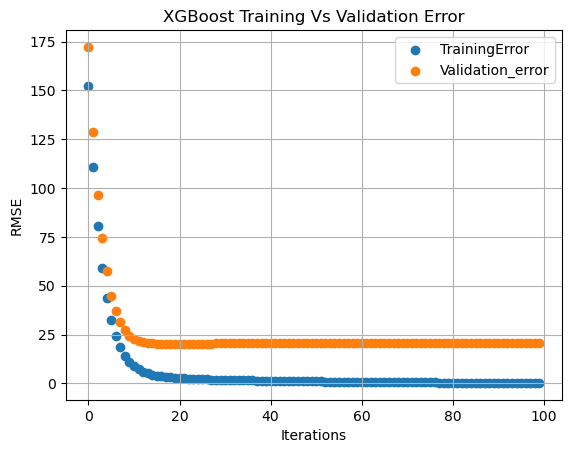

In [36]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='TrainingError')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation_error')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training Vs Validation Error')
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

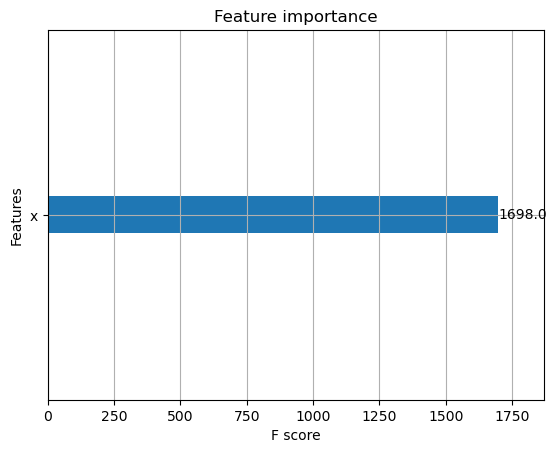

In [37]:
xgb.plot_importance(regressor)

In [38]:
### Validating Dataset: Compare Actual and Predicted

In [39]:
result = regressor.predict(X_validation)

In [40]:
result[:5]

array([319.26157 ,  41.579308, 313.13318 , 705.4059  , 538.32196 ],
      dtype=float32)

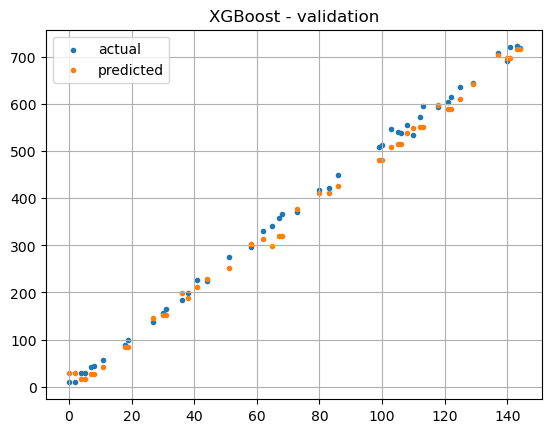

In [41]:
plt.title('XGBoost - validation')
plt.scatter(df_validation.x, df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x, result, label='predicted', marker='.')
plt.grid()
plt.legend()
plt.show()

In [43]:
print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y, result)
print(" Mean Squared error: {0:.2f}",mse)
print(" Root Mean Squared Error: {0:.2f}",mse**.5)

XGBoost Algorithm Metrics
 Mean Squared error: {0:.2f} 434.08580331366335
 Root Mean Squared Error: {0:.2f} 20.834725899652803


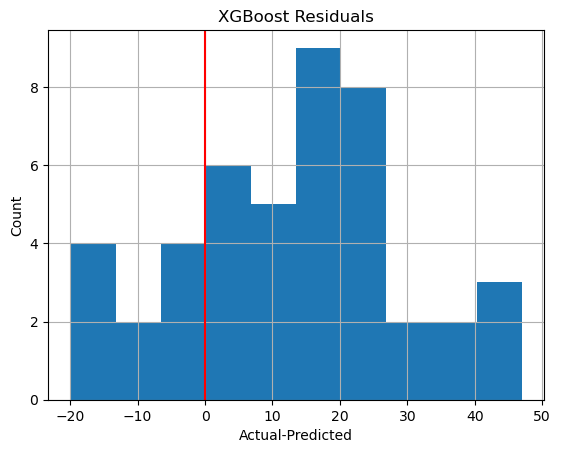

In [45]:
# Residual
# Over prdiction and Under Prediction needs to be balanced
# Training Data Residuals

residuals = df_validation.y - result
plt.hist(residuals)
plt.xlabel('Actual-Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residuals')
plt.axvline(color='r')
plt.grid()
plt.show()

In [47]:
# count number of values greater than zero and less than zero

value_counts = (residuals>0).value_counts(sort=False)

print(' Under EStimation: {0}'.format(value_counts[True]))
print(' Over Estimation: {0}'.format(value_counts[False]))

 Under EStimation: 35
 Over Estimation: 10


In [48]:
value_counts

True     35
False    10
Name: y, dtype: int64

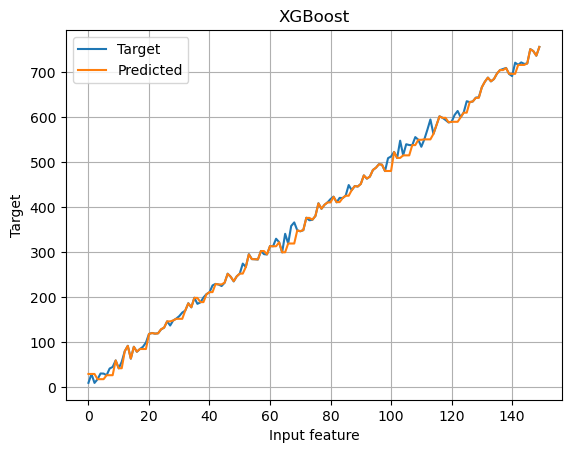

In [49]:
# plot entire dataset
plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, regressor.predict(df[['x']]),label='Predicted')
plt.grid()
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

## Linear Regression Algorithm

In [51]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression()

Compare WEights assigned by Linear Regression

Origional function: 5*x + 8 + some noise

In [52]:
lin_regressor.coef_

array([4.99025605])

In [53]:
lin_regressor.intercept_

8.711480013720973

In [54]:
result = lin_regressor.predict(df_validation[['x']])

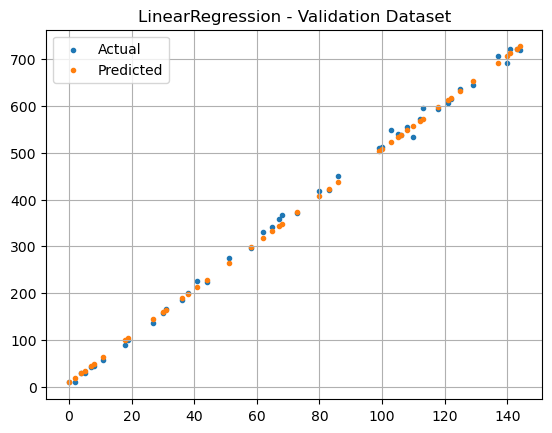

In [55]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x, df_validation.y, label='Actual', marker='.')
plt.scatter(df_validation.x, result, label='Predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
# RMSE metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y, result)
print(" Mean squared Error: {0:.2f}".format(mse))
print(" Root Mean SQuared Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean squared Error: 97.20
 Root Mean SQuared Error: 9.86


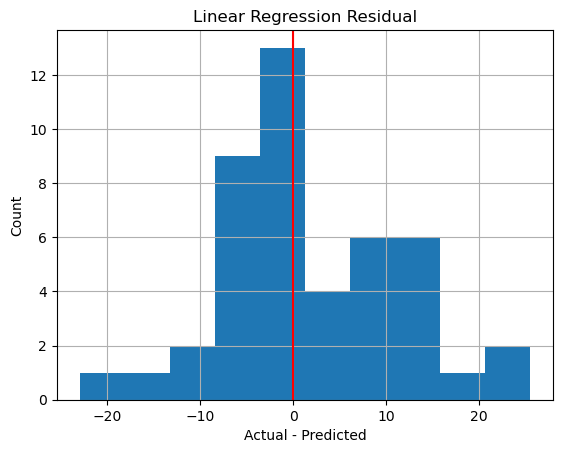

In [59]:
# Residual
# Over prediction and Under Predition needs to be balanced
# Training Data Residuals

residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

In [60]:
# Count number of values greater than zero and less than zero

value_counts = (residuals>0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Under Estimation: {0}'.format(value_counts[False]))


 Under Estimation: 24
 Under Estimation: 21


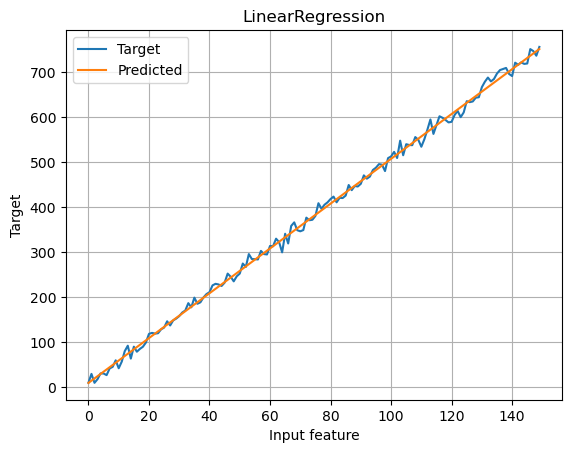

In [63]:
# plot for enteire dataset
plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, lin_regressor.predict(df[['x']]),label='Predicted')
plt.grid()
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

### Input Features - Outside range used for training

XGBoost Prediction has and upper and lower bound (applies to tree based algorithms)

Linear Regression extrapolates

In [64]:
# True function

def straight_line(x):
    return 5*x+8

In [67]:
# X is outside range of training samples

X = np.array([-100, -5, 160, 1000, 5000])
y = straight_line(X)

df_tmp = pd.DataFrame({'x': X, 'y':y})
df_tmp['xgboost'] = regressor.predict(df_tmp[['x']])
df_tmp['linear'] = lin_regressor.predict(df_tmp[['x']])

In [68]:
df_tmp

,x,y,xgboost,linear
0,-100,-492,28.838404,-490.314125
1,-5,-17,28.838404,-16.239800
2,160,808,756.747498,807.152448
3,1000,5008,756.747498,4998.967527
4,5000,25008,756.747498,24959.991717


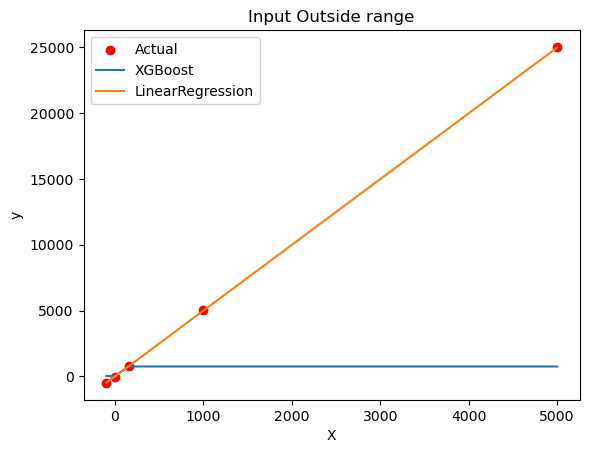

In [69]:
# XGBoost Preditions have an upper bound and lower bound
# Linear Regression Extrapolates

plt.scatter(df_tmp.x, df_tmp.y, label='Actual', color='r')
plt.plot(df_tmp.x, df_tmp.xgboost, label='XGBoost')
plt.plot(df_tmp.x, df_tmp.linear, label='LinearRegression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input Outside range')
plt.show()

### X is inside range of training samples

In [71]:
X = np.array([0,1,3,5,7,9,11,15,18,125])
y = straight_line(X)

In [73]:
df_tmp = pd.DataFrame({'x':X, 'y':y})
df_tmp['xgboost'] = regressor.predict(df_tmp[['x']])
df_tmp['linear'] = lin_regressor.predict(df_tmp[['x']])

In [74]:
df_tmp

,x,y,xgboost,linear
0,0,8,28.838404,8.711480
1,1,13,28.838404,13.701736
2,3,23,17.243698,23.682248
3,5,33,17.243698,33.662760
4,7,43,26.082355,43.643272
5,9,53,58.846405,53.623784
6,11,63,41.579308,63.604297
7,15,83,89.226082,83.565321
8,18,98,84.422783,98.536089
9,125,633,610.547424,632.493486


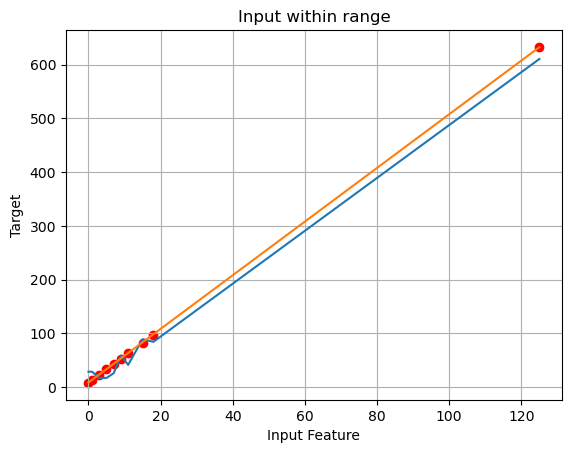

In [75]:
# XGBoost predictions have an upper boundand lower bound
# Linear Regression Extrapolates

plt.scatter(df_tmp.x, df_tmp.y, label='Actual',color='r')
plt.plot(df_tmp.x, df_tmp.xgboost, label='XGBoost')
plt.plot(df_tmp.x, df_tmp.linear, label='LinearRegression')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.grid()
plt.title('Input within range')
plt.show()

### Summary

1. Use Sagemaker notebook as your own server on the cloud
2. Install python packages
3. Train directly on SageMaker Notebook (for small datasets, it takes few sections)
4. Once happy with algorithm and performance, you can train on sagemaker cloud (takes several minutes even for small datasets)
5. Not all algorithms are available for installation (for example: AWS algorithms like DeepAR are available only in Sagemaker)
6. In this excercise, we installed XGBoost and compared performance of XGBoost model and Linear Regression